## 通过日志得到不同用户的点击次数

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run /home/doom/github/NginxConfParser/nginxlogparser.py

In [3]:
cd logs/

/home/doom/tmp/logs


In [4]:
result = logparser('access.log-20160626.log')

In [5]:
from pandas import Series, DataFrame

In [14]:
dtindex = ['request_time', 'remote_addr', 'http_referer', 'time_local', 'request', 'bytes_sent', 'status', 'http_user_agent', 'host']
df = DataFrame(result, columns=dtindex)

In [15]:
df['status'] = df['status'].astype(np.int32)

In [57]:
df_1 =  df[~df['request'].str.contains("HEAD|js|css")]

In [67]:
df_token = df[df['request'].str.contains('access_token')]

In [85]:
for i in df_token[1:3]['request']:
    print(i)

b'GET /api/default/wbShorturlShorten?access_token=c532288357d1153ba26b8da7a98cbdf192d1cd62&url_long=http://new.gaokaozhitongche.com/school/chkfake&wbaccount_id=1 HTTP/1.1'
b'GET /api/target/view?access_token=df07ec2243589ebf88d0366ff988ce1e422ae043&uid=9080 HTTP/1.1'


In [96]:
df_tokens = [x.split()[1].split('access_token=')[1].split('&')[0] for x in df_token['request']]

In [147]:
ds = Series(df_tokens)

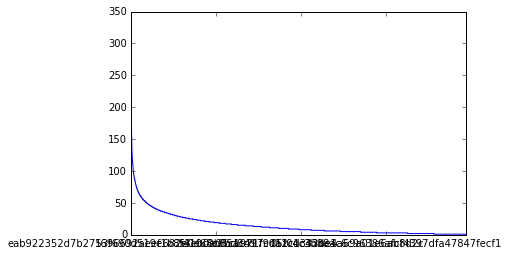

In [151]:
ds.value_counts()[1:].plot()

In [114]:
df_token_result = DataFrame(df_tokens)

In [122]:
df_token_result.columns = ['one']

AttributeError: 'DataFrame' object has no attribute 'value_counts'